# Importing Libraries and reading data

In [14]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from tpot import TPOTClassifier

In [2]:
data = pd.read_csv("model_data.csv")

# Splitting data and training tpot classifier

In [3]:
X = data.drop(columns="stroke")
y = data["stroke"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [4]:
tpt  = TPOTClassifier(generations=10,verbosity=2)
tpt.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/1100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.989971328718784

Generation 2 - Current best internal CV score: 0.989971328718784

Generation 3 - Current best internal CV score: 0.989971328718784

Generation 4 - Current best internal CV score: 0.9912739210097719

Generation 5 - Current best internal CV score: 0.992445371878393

Generation 6 - Current best internal CV score: 0.992445371878393

Generation 7 - Current best internal CV score: 0.9949206874321389

Generation 8 - Current best internal CV score: 0.9949206874321389

Generation 9 - Current best internal CV score: 0.9967437737513573

Generation 10 - Current best internal CV score: 0.9967437737513573

Best pipeline: RandomForestClassifier(ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.7500000000000001, min_samples_leaf=2, min_samples_split=8, n_estimators=100), bootstrap=True, criterion=gini, max_features=0.7500000000000001, min_samples_leaf=1, min_samples_split=7, n_estimators=100)


TPOTClassifier(generations=10, verbosity=2)

In [9]:
tpt.fitted_pipeline_

Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=ExtraTreesClassifier(criterion='entropy',
                                                                  max_features=0.7500000000000001,
                                                                  min_samples_leaf=2,
                                                                  min_samples_split=8))),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=0.7500000000000001,
                                        min_samples_split=7))])

# Model score

In [10]:
tpt.score(X_test,y_test)

C:\Users\IAmAlight\anaconda3\envs\Ai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\IAmAlight\anaconda3\envs\Ai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


0.996875

# Model Parameters

In [11]:
tpt.get_params()

{'config_dict': None,
 'crossover_rate': 0.1,
 'cv': 5,
 'disable_update_check': False,
 'early_stop': None,
 'generations': 10,
 'log_file': None,
 'max_eval_time_mins': 5,
 'max_time_mins': None,
 'memory': None,
 'mutation_rate': 0.9,
 'n_jobs': 1,
 'offspring_size': None,
 'periodic_checkpoint_folder': None,
 'population_size': 100,
 'random_state': None,
 'scoring': None,
 'subsample': 1.0,
 'template': None,
 'use_dask': False,
 'verbosity': 2,
 'warm_start': False}

In [12]:
tpt.pareto_front_fitted_pipelines_

{'RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.35000000000000003, RandomForestClassifier__min_samples_leaf=1, RandomForestClassifier__min_samples_split=10, RandomForestClassifier__n_estimators=100)': Pipeline(steps=[('randomforestclassifier',
                  RandomForestClassifier(bootstrap=False, criterion='entropy',
                                         max_features=0.35000000000000003,
                                         min_samples_split=10))]),
 'RandomForestClassifier(ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=entropy, ExtraTreesClassifier__max_features=0.7500000000000001, ExtraTreesClassifier__min_samples_leaf=2, ExtraTreesClassifier__min_samples_split=8, ExtraTreesClassifier__n_estimators=100), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifi

C:\Users\IAmAlight\anaconda3\envs\Ai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\IAmAlight\anaconda3\envs\Ai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


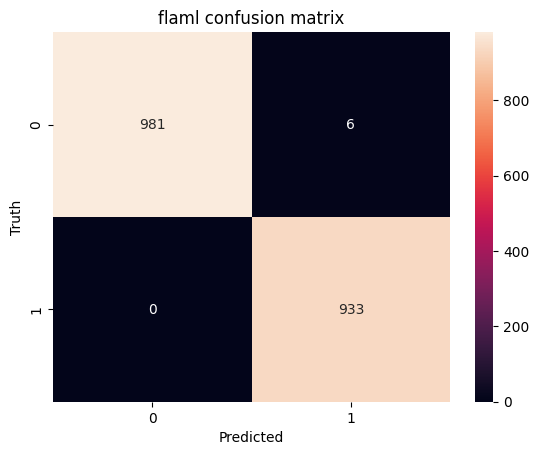

In [15]:
y_predicted = tpt.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title(f"flaml confusion matrix")
plt.show()